In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Missing Values

Missing values occurs in dataset when some of the information is not stored for a variable There are 3 machanisms.



1. **Missing Completey at Random,(MCAR)**

   Missing completely at random (MCAR) is a type of missing data where the probability of a missing value is not related to any other data in the dataset. This means that there is no systematic reason why some data values are missing.
   
   Example of MCAR:
   * A batch of lab samples was processed incorrectly, causing some participants to have missing laboratory values
   *  Data is missing due to test design, failure in observations, or failure in recording observations 

2. **Missing At Random,(MAR)**

Missing at random (MAR) occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information. Since MAR is an assumption that is impossible to verify statistically, we must rely on its substantive reasonableness.

An example is that males are less likely to fill in a depression survey but this has nothing to do with their level of depression, after accounting for maleness. Depending on the analysis method, these data can still induce parameter bias in analyses due to the contingent emptiness of cells (male, very high depression may have zero entries). However, if the parameter is estimated with Full Information Maximum Likelihood, MAR will provide asymptotically unbiased estimates

3. **Missing Data not at Random(MNAR)**

   Missing Data Not at Random (MNAR)" refers to a situation in statistics where missing data is not random and is systematically related to the unobserved values, meaning the reason why data is missing is directly linked to the missing information itself, making it the most challenging type of missing data to handle; essentially, the missing values are not randomly distributed but are influenced by the very data that is missing.

   **Key points about MNAR:**

**Relationship to missingness:**
Unlike "Missing at Random (MAR)," where missingness depends only on observed data, MNAR implies that the missingness is linked to the unobserved data, creating bias in analysis if not properly addressed.

**Example scenario:**
Imagine a survey where people with severe depression are more likely to skip questions about their depression level; this creates MNAR because the missing data is directly related to the severity of the unobserved depression level. 

# Example

In [2]:
import seaborn as sns

In [3]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1. Checking missing values

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
#delete the rows or datapoint to handle missing values 
df.shape

(891, 15)

In [6]:
df.dropna().shape

(182, 15)

In [7]:
#column wise delete
df.dropna(axis=1)
#for permanent deletion of columns we can use inplace=True in dropna() function

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


**Imputation Techniques**

1. Mean values Imputation

   1. Mean Imputation works well when we have normally distributed data.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


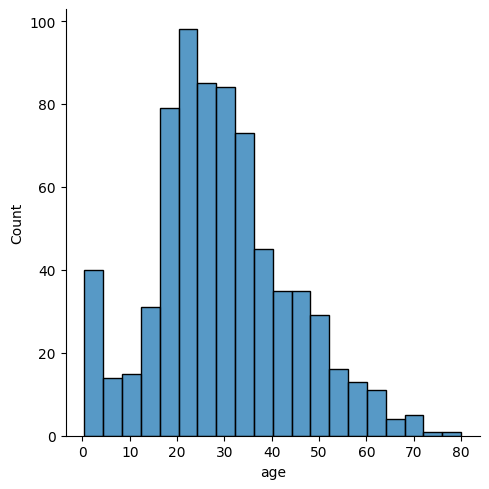

In [8]:
sns.displot(df['age'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

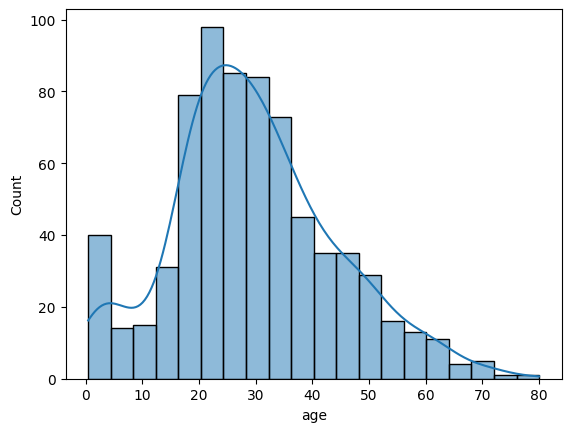

In [9]:
sns.histplot(df['age'],kde = True)

In [10]:
df['age_mean'] =df['age'].fillna(df['age'].mean())
df[['age','age_mean']]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


2. **Median Value Imputation**

   1. if we outliers in tha dataset.

In [11]:
df['age_median'] = df['age'].fillna(df['age'].median())
df[['age','age_mean','age_median']]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,age_mean,age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


3. **Mode Imputation:**

   

     This can we used for the Categorical variable.

     
   

In [12]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [13]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
mode_value =df[df['embarked'].notna()]['embarked'].mode()[0]

In [15]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)
df[['embarked','embarked_mode']]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [16]:
df['embarked_mode'].isnull().sum()

0